In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Simulate synthetic SOC alert timeline
np.random.seed(42)

# Create 20 alert events
n_alerts = 20
time_stamps = [f"{i*5:02d}:00–{(i+1)*5:02d}:00" for i in range(n_alerts)]
alert_types = ["Suspicious Login", "Phishing Alert", "Malware Detected", "Benign Traffic"]
task_types = ["Triage", "Escalation", "Correlation", "Reporting"]
stress_mapping = {
    "Triage": "baseline",
    "Escalation": "stress",
    "Correlation": "stress",
    "Reporting": "baseline"
}
stress_probs = {
    "baseline": lambda: round(np.random.normal(0.25, 0.05), 2),
    "stress": lambda: round(np.random.normal(0.80, 0.10), 2)
}

data = []
for i in range(n_alerts):
    task = random.choice(task_types)
    alert = random.choice(alert_types)
    stress_label = stress_mapping[task]
    stress_prob = stress_probs[stress_label]()
    # Simulated agent decision based on threshold
    decision = "ESCALATE" if stress_prob > 0.65 else "MONITOR"
    expected = "ESCALATE" if stress_label == "stress" else "MONITOR"
    correctness = decision == expected
    data.append([time_stamps[i], task, alert, stress_label, stress_prob, decision, expected, correctness])

df = pd.DataFrame(data, columns=[
    "TimeWindow", "TaskType", "AlertType", "StressLabel", "StressProb", "AgentDecision", "ExpectedDecision", "Correct"
])

In [3]:
df

,TimeWindow,TaskType,AlertType,StressLabel,StressProb,AgentDecision,ExpectedDecision,Correct
0,00:00–05:00,Escalation,Suspicious Login,stress,0.85,ESCALATE,ESCALATE,True
1,05:00–10:00,Correlation,Phishing Alert,stress,0.79,ESCALATE,ESCALATE,True
2,10:00–15:00,Escalation,Benign Traffic,stress,0.86,ESCALATE,ESCALATE,True
3,15:00–20:00,Triage,Phishing Alert,baseline,0.33,MONITOR,MONITOR,True
4,20:00–25:00,Reporting,Phishing Alert,baseline,0.24,MONITOR,MONITOR,True
5,25:00–30:00,Reporting,Suspicious Login,baseline,0.24,MONITOR,MONITOR,True
6,30:00–35:00,Reporting,Suspicious Login,baseline,0.33,MONITOR,MONITOR,True
7,35:00–40:00,Triage,Malware Detected,baseline,0.29,MONITOR,MONITOR,True
8,40:00–45:00,Reporting,Phishing Alert,baseline,0.23,MONITOR,MONITOR,True
9,45:00–50:00,Reporting,Phishing Alert,baseline,0.28,MONITOR,MONITOR,True


In [3]:
print("Simulated SOC Stress-Aware Agent Decisions:")
print(df.to_string(index=False))
df.to_csv("simulated_soc_decisions.csv", index=False)


Simulated SOC Stress-Aware Agent Decisions:
  TimeWindow    TaskType        AlertType StressLabel  StressProb AgentDecision ExpectedDecision  Correct
 00:00–05:00  Escalation Suspicious Login      stress        0.85      ESCALATE         ESCALATE     True
 05:00–10:00 Correlation Suspicious Login      stress        0.79      ESCALATE         ESCALATE     True
 10:00–15:00      Triage Suspicious Login    baseline        0.28       MONITOR          MONITOR     True
 15:00–20:00   Reporting   Phishing Alert    baseline        0.33       MONITOR          MONITOR     True
 20:00–25:00      Triage Malware Detected    baseline        0.24       MONITOR          MONITOR     True
 25:00–30:00  Escalation Malware Detected      stress        0.78      ESCALATE         ESCALATE     True
 30:00–35:00   Reporting Suspicious Login    baseline        0.33       MONITOR          MONITOR     True
 35:00–40:00 Correlation   Phishing Alert      stress        0.88      ESCALATE         ESCALATE     True
 4

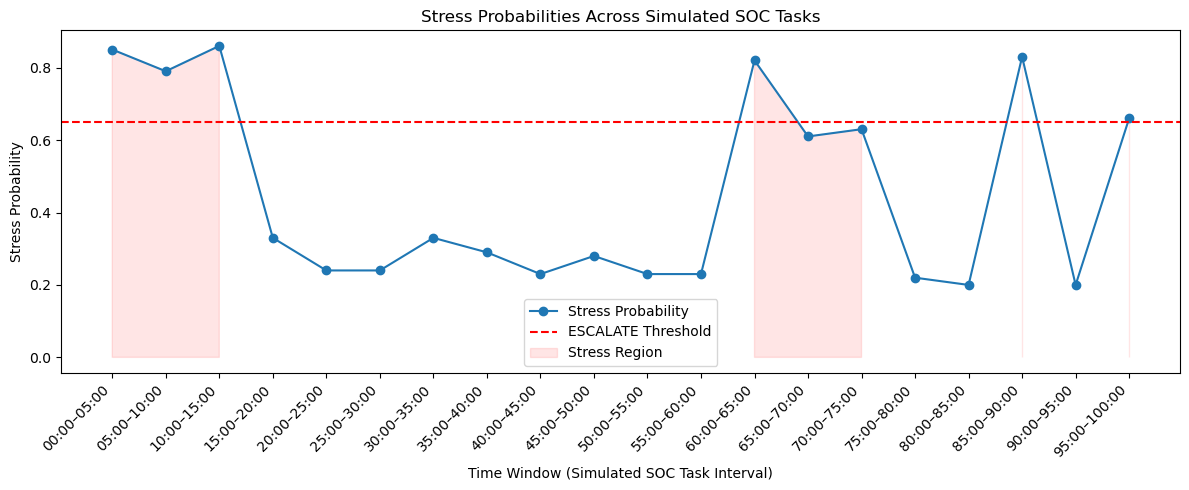

In [7]:
x = np.arange(len(df))  # 0, 1, ..., 19
y = df["StressProb"].astype(float).values
stress_region = df["StressLabel"].apply(lambda x: x == "stress").values

plt.figure(figsize=(12, 5))
plt.plot(x, y, label="Stress Probability", marker='o')
plt.axhline(0.65, color='r', linestyle='--', label="ESCALATE Threshold")
plt.fill_between(x, 0, y, where=stress_region, color='red', alpha=0.1, label="Stress Region")

# ✅ This makes x-axis show "00:00–05:00", "05:00–10:00", etc.
plt.xticks(ticks=x, labels=df["TimeWindow"], rotation=45, ha='right')

plt.title("Stress Probabilities Across Simulated SOC Tasks")
plt.ylabel("Stress Probability")
plt.xlabel("Time Window (Simulated SOC Task Interval)")
plt.legend()
plt.tight_layout()
plt.savefig("s1.png", dpi=300, bbox_inches='tight')
plt.show()


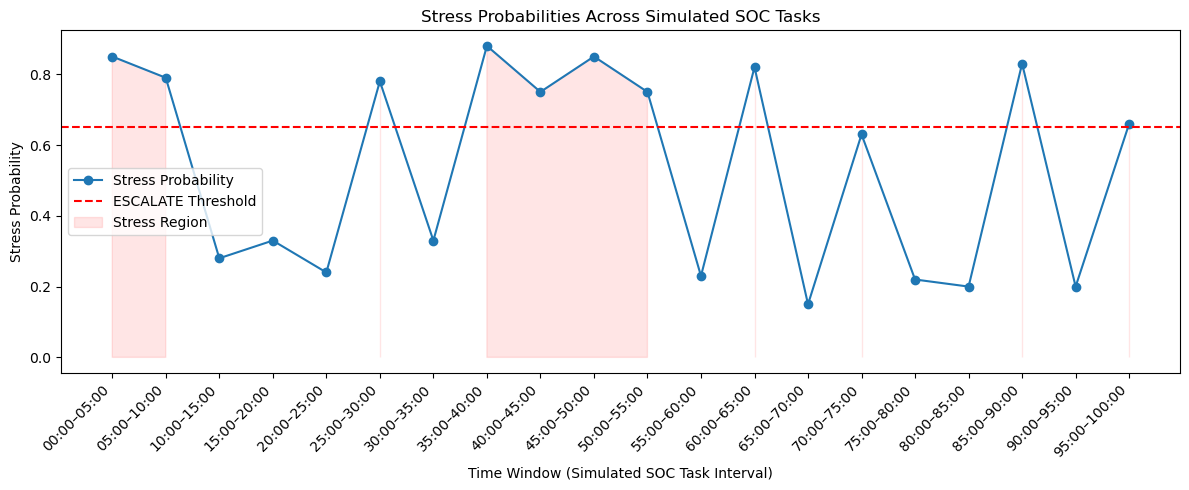

In [10]:
x = np.arange(len(df))  # 0, 1, ..., 19
y = df["StressProb"].astype(float).values
stress_region = df["StressLabel"].apply(lambda x: x == "stress").values

plt.figure(figsize=(12, 5))
plt.plot(x, y, label="Stress Probability", marker='o')
plt.axhline(0.65, color='r', linestyle='--', label="ESCALATE Threshold")
plt.fill_between(x, 0, y, where=stress_region, color='red', alpha=0.1, label="Stress Region")

# ✅ This makes x-axis show "00:00–05:00", "05:00–10:00", etc.
plt.xticks(ticks=x, labels=df["TimeWindow"], rotation=45, ha='right')

plt.title("Stress Probabilities Across Simulated SOC Tasks")
plt.ylabel("Stress Probability")
plt.xlabel("Time Window (Simulated SOC Task Interval)")
plt.legend()
plt.tight_layout()
plt.savefig("s1.png", dpi=300, bbox_inches='tight')
plt.show()


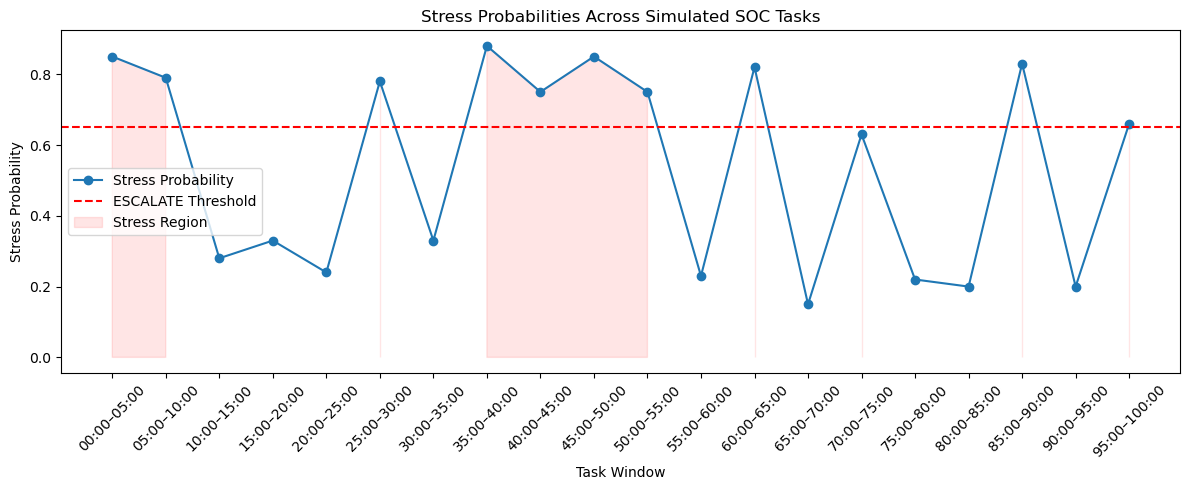

In [9]:
x = np.arange(len(df))
y = df["StressProb"].astype(float).values
stress_region = df["StressLabel"].apply(lambda x: x == "stress").values

plt.figure(figsize=(12, 5))
plt.plot(x, y, label="Stress Probability", marker='o')
plt.axhline(0.65, color='r', linestyle='--', label="ESCALATE Threshold")
plt.fill_between(x, 0, y, where=stress_region, color='red', alpha=0.1, label="Stress Region")
plt.xticks(x, df["TimeWindow"], rotation=45)
plt.title("Stress Probabilities Across Simulated SOC Tasks")
plt.ylabel("Stress Probability")
plt.xlabel("Task Window")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\14377\AppData\Local\Temp\ipykernel_7016\3836165207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AgentDecision", palette="Set2")


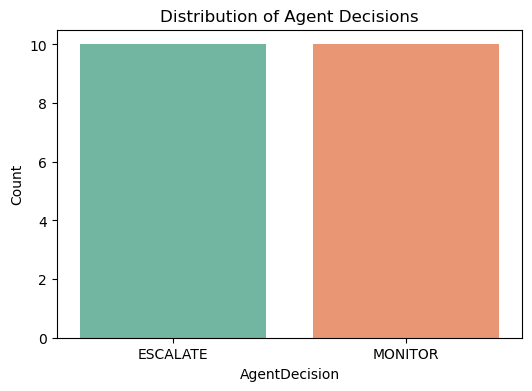

In [11]:
# Plot 2: Bar chart of decisions
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="AgentDecision", palette="Set2")
plt.title("Distribution of Agent Decisions")
plt.ylabel("Count")
plt.show()

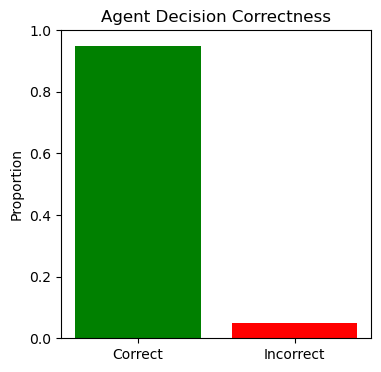

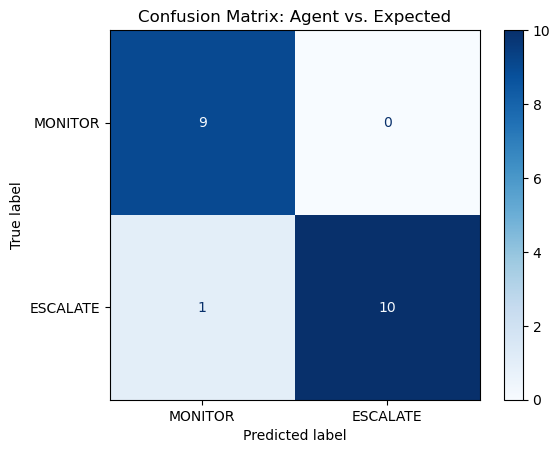

In [12]:


# Plot 3: Correctness rate
correct_rate = df["Correct"].mean()
plt.figure(figsize=(4, 4))
plt.bar(["Correct", "Incorrect"], [correct_rate, 1 - correct_rate], color=["green", "red"])
plt.title("Agent Decision Correctness")
plt.ylabel("Proportion")
plt.ylim(0, 1)
plt.show()

# Plot 4: Confusion Matrix
cm = confusion_matrix(df["ExpectedDecision"], df["AgentDecision"], labels=["MONITOR", "ESCALATE"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["MONITOR", "ESCALATE"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Agent vs. Expected")
plt.show()